In [5]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [25]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

## Description of the features from the UCI website

1. **age (int):** age in years
2. **sex (cat):** sex (1 = male; 0 = female)
3. **cp (cat):** chest pain type

        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic

4. **trestbps (int):** resting blood pressure (in mm Hg on admission to the hospital)
5. **chol (int):** serum cholestoral in mg/dl
6. **fbs (cat):** (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. **restecg (cat):** resting electrocardiographic results

        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. **thalach (int):** maximum heart rate achieved
9. **exang (cat):** exercise induced angina (1 = yes; 0 = no)
10. **oldpeak (int):** = ST depression induced by exercise relative to rest
11. **slope (cat):** the slope of the peak exercise ST segment

        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping

12. **ca (int):** number of major vessels (0-3) colored by flourosopy
13. **thal (cat):** 3 = normal; 6 = fixed defect; 7 = reversable defect
14. **num (cat):** diagnosis of heart disease (angiographic disease status)

        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [8]:
# Exploring feature variable

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [9]:
X.shape

(303, 13)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [11]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [12]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [141]:
all_df = pd.merge(X,y, left_index=True, right_index=True)

In [142]:
all_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [143]:
all_df.shape

(303, 14)

In [144]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


## Missing Data Cleanup

In [146]:
# Checking rows with missing data

all_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [147]:
# Total number of rows with any missing value

all_df.isna().any(axis=1).sum()

6

In [150]:
# Total percentage of observations with any missing value

(all_df.isna().any(axis=1).sum()/len(all_df)*100).round(2)

1.98

In [157]:
# Inspecting rows with missing 'ca'

all_df[all_df['ca'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [158]:
# Inspecting rows with missing 'thal'

all_df[all_df['thal'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2


In [155]:
# Unique values for 'ca'

sorted(all_df['ca'].unique())

[0.0, 1.0, 2.0, 3.0, nan]

In [152]:
# Distribution of 'ca' values

all_df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [156]:
# Unique values for 'thal'

sorted(all_df['thal'].unique())

[3.0, 6.0, 7.0, nan]

In [154]:
# Distribution of 'thal' values

all_df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64

In [160]:
# Safe to drop all rows containing missing values in either 'ca' or 'thal'

all_df.dropna(inplace=True)

In [161]:
# checking number of rows dropped

all_df.shape

(297, 14)

## Data Type Conversion

In [162]:
# printing column names

all_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [163]:
# crearting lists for categorical and numeric columns

num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']

In [168]:
# Unique values for 'sex'

sorted(all_df['sex'].unique())

[0, 1]

In [166]:
# Converting 'sex' to categorical and saving in a new column

sex_dict = {0: 'Female',
            1: 'Male'}

all_df['sex1'] = all_df['sex'].map(sex_dict)

In [169]:
# Unique values for 'cp'

sorted(all_df['cp'].unique())

[1, 2, 3, 4]

In [172]:
# Converting 'cp' to categorical and saving in a new column

cp_dict = {1: 'typical_angina',
           2: 'atypical_angina',
           3: 'non-anginal_pain',
           4: 'asymptomatic'}

all_df['cp1'] = all_df['cp'].map(cp_dict)

In [173]:
all_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,sex1,cp1
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,Male,typical_angina
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Male,asymptomatic
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Male,asymptomatic
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Male,non-anginal_pain
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,Female,atypical_angina


## Univariate Analysis

In [136]:
# Function to explore categorical columns

def cat_exp(df, col):

    print(f'Exploring Data Distribution for Categorical Variable: {col} \n')
    
    # Counting number of observations in each category
    count_df = pd.DataFrame(all_df[col].value_counts()).sort_index().reset_index()
    count_df.columns = [col, 'count']
    print(count_df)

    # Converting numeric data to string for categorical
    df[col] = df[col].astype(str)
    # Sorting values for plotting
    df = df.sort_values([col])

    # Plotting count chart for categories
    fig= plt.figure(figsize=(12,8))
    ax = fig.add_subplot()
    sns.histplot(df, x=col)
    ax.set_title('Count of Observations')
    plt.show()



In [137]:
# Function to explore numerical columns

def num_exp(df, col):

    print(f'Exploring Data Distribution for Categorical Variable: {col} \n')

    # Data distribution statistics
    print(pd.DataFrame(df[col].describe().round(2)).T)

    # Plottting histogram and Box-plot
    fig= plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)
    sns.histplot(df, x=col, ax=ax1)
    ax1.set_title(f'Distribution of {col}')
    sns.boxplot(x=df[col], ax=ax2)
    plt.show()
    

Exploring Data Distribution for Categorical Variable: age 

     count   mean   std   min   25%   50%   75%   max
age  303.0  54.44  9.04  29.0  48.0  56.0  61.0  77.0


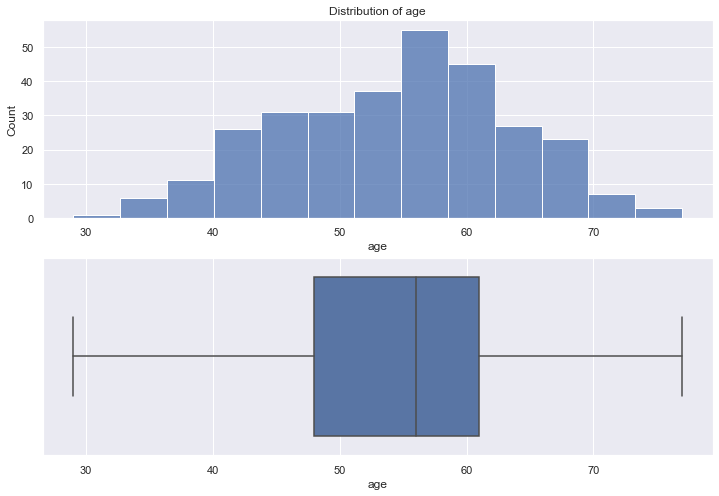

Exploring Data Distribution for Categorical Variable: trestbps 

          count    mean   std   min    25%    50%    75%    max
trestbps  303.0  131.69  17.6  94.0  120.0  130.0  140.0  200.0


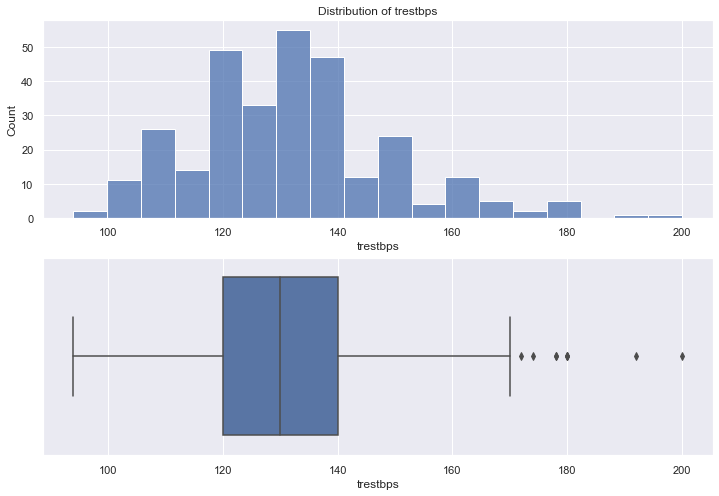

Exploring Data Distribution for Categorical Variable: chol 

      count    mean    std    min    25%    50%    75%    max
chol  303.0  246.69  51.78  126.0  211.0  241.0  275.0  564.0


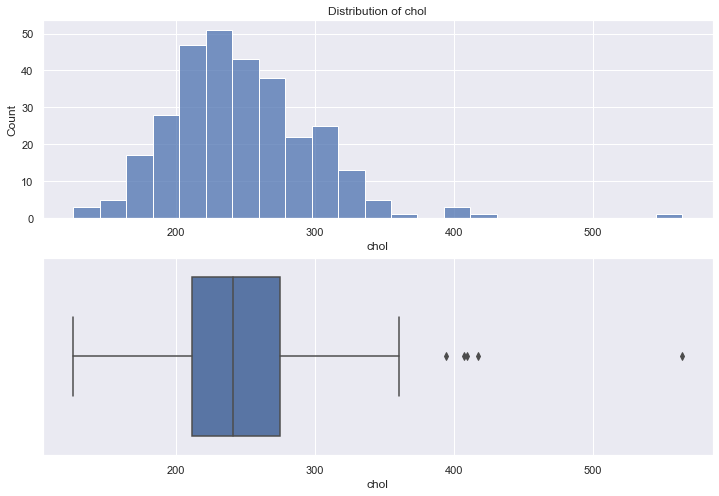

Exploring Data Distribution for Categorical Variable: thalach 

         count    mean    std   min    25%    50%    75%    max
thalach  303.0  149.61  22.88  71.0  133.5  153.0  166.0  202.0


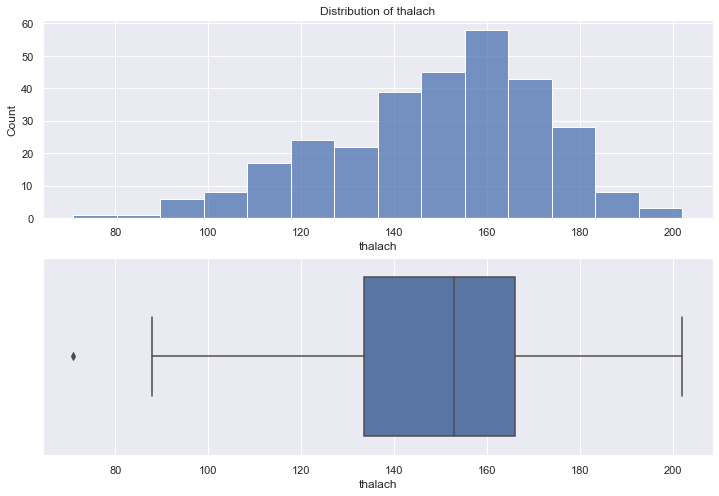

Exploring Data Distribution for Categorical Variable: oldpeak 

         count  mean   std  min  25%  50%  75%  max
oldpeak  303.0  1.04  1.16  0.0  0.0  0.8  1.6  6.2


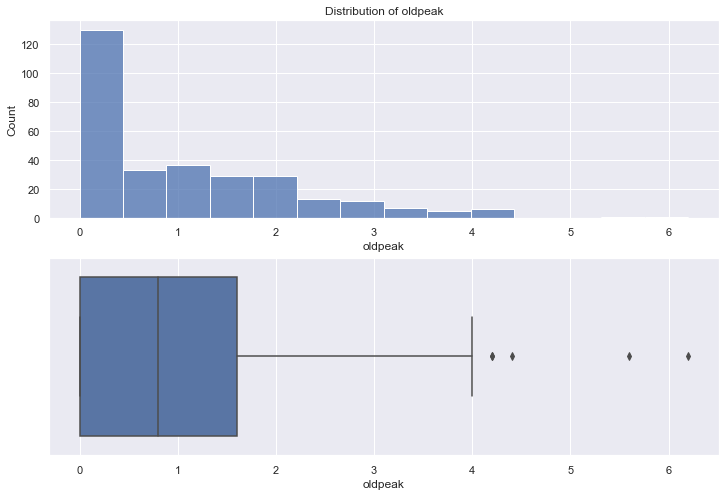

Exploring Data Distribution for Categorical Variable: ca 

    count  mean   std  min  25%  50%  75%  max
ca  299.0  0.67  0.94  0.0  0.0  0.0  1.0  3.0


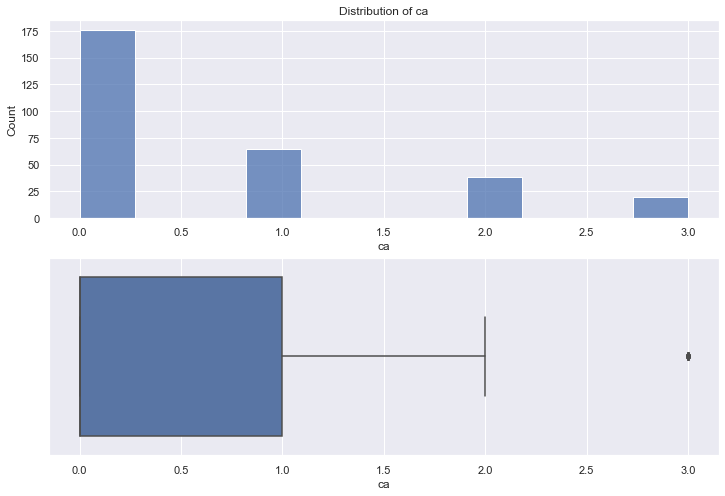

In [138]:
for col in num:
    num_exp(all_df, col)

Exploring Data Distribution for Categorical Variable: sex 

  sex  count
0   0     97
1   1    206


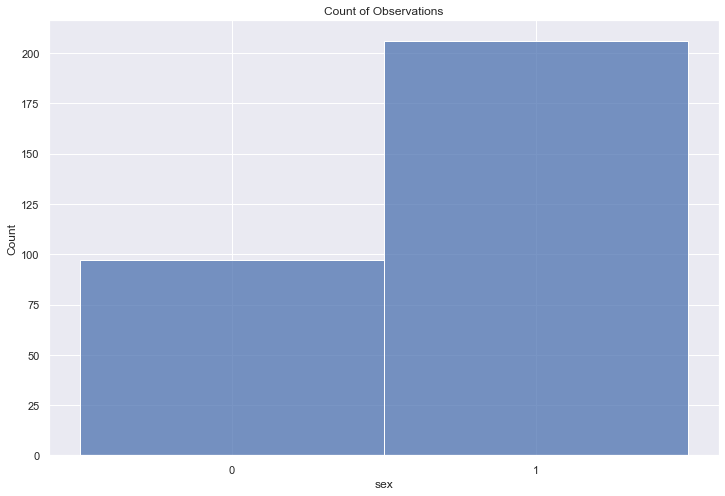

Exploring Data Distribution for Categorical Variable: cp 

  cp  count
0  1     23
1  2     50
2  3     86
3  4    144


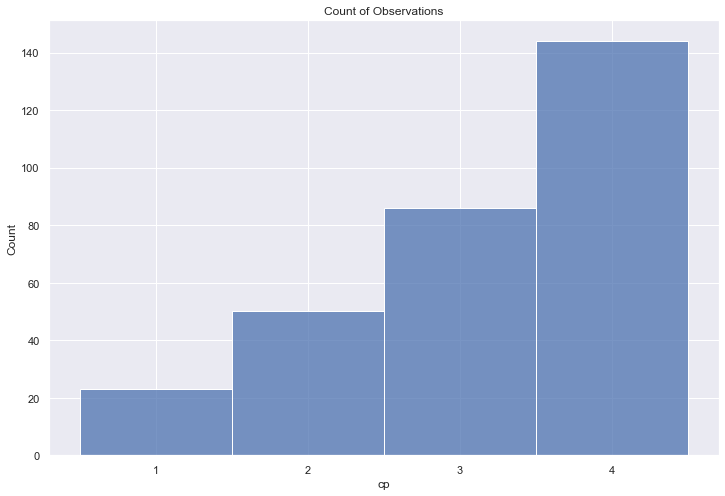

Exploring Data Distribution for Categorical Variable: fbs 

   fbs  count
0    0    258
1    1     45


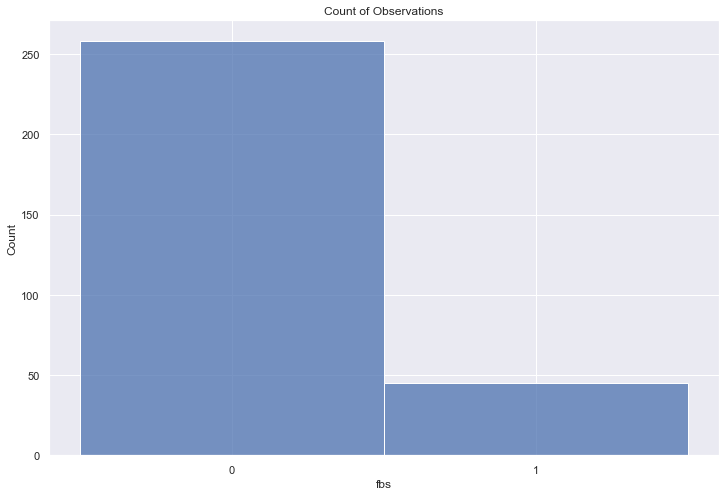

Exploring Data Distribution for Categorical Variable: restecg 

   restecg  count
0        0    151
1        1      4
2        2    148


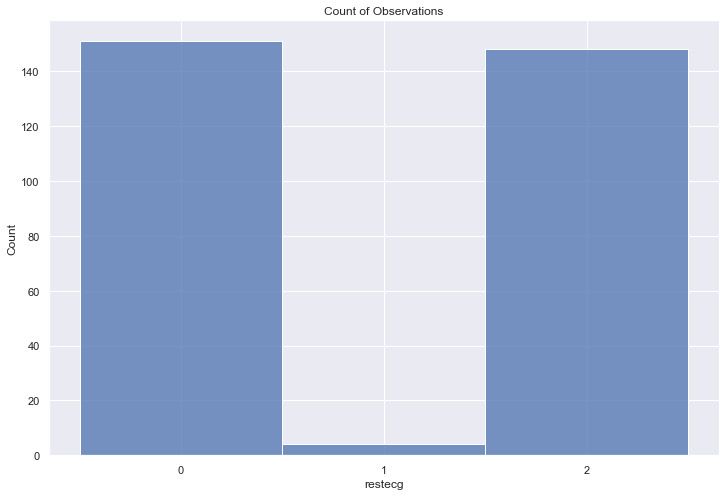

Exploring Data Distribution for Categorical Variable: exang 

   exang  count
0      0    204
1      1     99


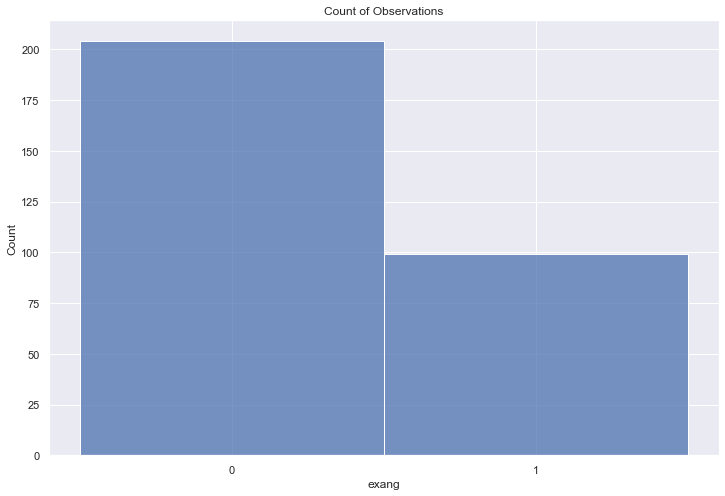

Exploring Data Distribution for Categorical Variable: slope 

   slope  count
0      1    142
1      2    140
2      3     21


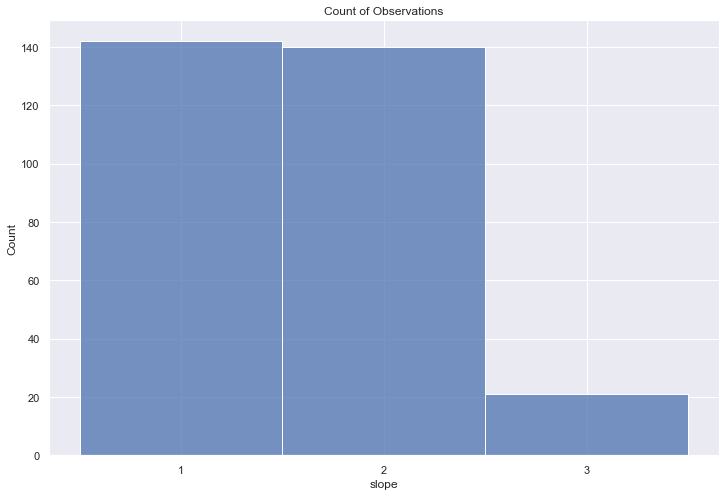

Exploring Data Distribution for Categorical Variable: thal 

   thal  count
0   3.0    166
1   6.0     18
2   7.0    117


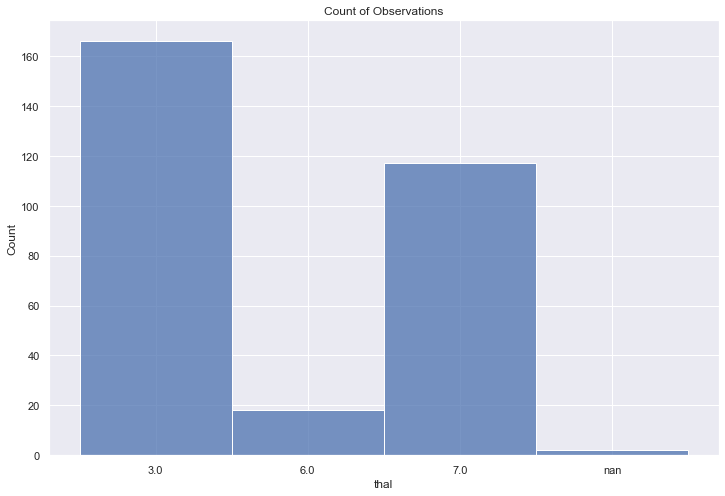

Exploring Data Distribution for Categorical Variable: num 

   num  count
0    0    164
1    1     55
2    2     36
3    3     35
4    4     13


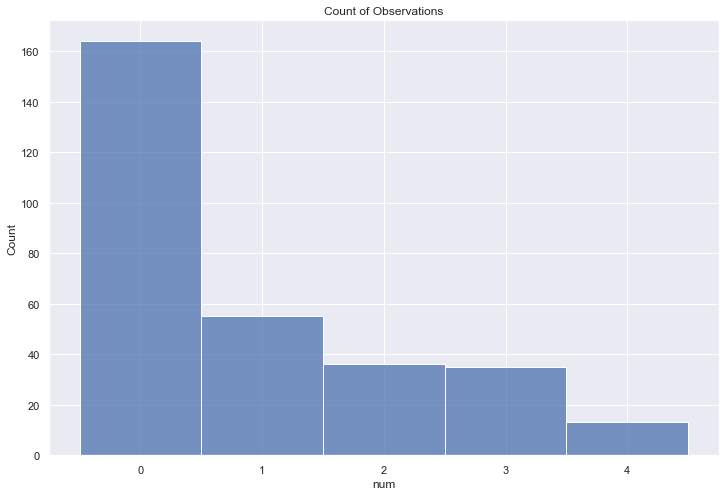

In [139]:
for col in cat:
    cat_exp(all_df, col)

In [140]:
# 

all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        299 non-null    float64
 12  thal      303 non-null    object 
 13  num       303 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 33.3+ KB


In [33]:
all_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,Male,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,Male,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,Male,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,Male,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,Female,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [30]:
all_df['sex'] = np.where(all_df['sex']==0, 'Female', 'Male')

In [35]:
sns.set_theme()

In [32]:
# Converting target to binary

all_df['disease'] = np.where(all_df['num']>0, 'Yes', 'No')

all_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,No
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Yes
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Yes
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,No
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,Yes
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2,Yes
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,Yes
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,Yes


In [33]:
all_df.groupby('disease')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
disease,,,,,,,,
No,164.0,52.585366,9.511957,29.0,44.75,52.0,59.0,76.0
Yes,139.0,56.625899,7.938416,35.0,52.00,58.0,62.0,77.0


**Observation:**

Older patients are more likely to have heart disease

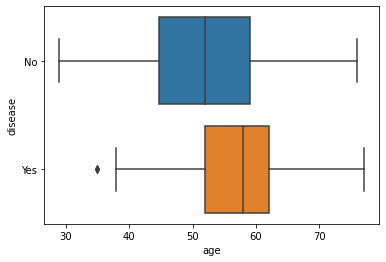

In [35]:
sns.boxplot(data=all_df, x='age', y='disease')
plt.show()

In [48]:
pd.crosstab(index=all_df['disease'], columns=all_df['sex'])

sex,0,1
disease,,
No,72,92
Yes,25,114


In [ ]:
# Checking impact of 'ca' values between healthy and disease population 

pd.crosstab(index=all_df['disease'], columns=all_df['ca'], normalize='columns',margins=True).round(2)

KeyError: 'disease'

In [ ]:
# Checking distribution of 'thal' values between healthy and disease population 

pd.crosstab(index=all_df['disease'], columns=all_df['thal'], normalize='columns',margins=True).round(2)

thal,3.0,6.0,7.0,All
disease,,,,
No,0.77,0.33,0.23,0.54
Yes,0.23,0.67,0.77,0.46


**Observations:**
* Both `ca` and `thal` are good indicators of heart disease.
* `ca` > 0 has higher likelihood for disease
* `thal` 6 and 7 have higher likelihood for disease